# Prediction of IPL Score (Teams Batting First) using Supervised Machine Learning Algorithms 

Demonstration of how efficiently Supervised Machine Learning Algorithms can perform in solving a regression problem using IPL Dataset (https://www.kaggle.com/vimalsajjan/ipldata).

Features of the Dataset are as follows:

1. mid: Unique match id.

2. date: Date of match.

3. venue: Name of the Stadium.

4. battingteam: Name of the Batting team.

5. bowlingteam: Name of the Bowling team name.

6. batsman: Batsman who faced that particular ball.

7. bowler: Bowler who bowled that particular ball.

8. runs: Runs scored by team till that point.

9. wickets: Number of Wickets fallen of the team till that point.

10. overs: Number of Overs bowled till that point.

11. runslast5: Runs scored in last 5 overs.

12. wicketslast5: Number of Wickets that fell in last 5 overs.

13. striker: max(runs scored by striker, runs scored by non-striker).

14. non-striker: min(runs scored by striker, runs scored by non-striker).

15. total: Total runs scored by batting team first.

# Import Libraries and reading data into dataframes

In [1]:
#pandas and numpy libraries are imported

import pandas as pd
import numpy as np

In [2]:
#Reading the data into dataframes and shape of the dataset is shown

IPLdata = pd.read_csv('IPLdata\IPLdata.csv')
print("Shape of the IPLdata:", IPLdata.shape)

Shape of the IPLdata: (76014, 15)


# Data Analysis

In [3]:
#random 5 rows of the IPLdata is displayed

IPLdata.sample(5)

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
52385,425,2014-05-13,JSCA International Stadium Complex,Rajasthan Royals,Chennai Super Kings,DH Yagnik,MM Sharma,141,7,19.1,34,4,3,1,148
6380,53,2008-05-27,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Chennai Super Kings,AC Gilchrist,MS Gony,2,0,1.2,2,0,2,0,147
11384,93,2009-05-12,SuperSport Park,Kings XI Punjab,Mumbai Indians,KC Sangakkara,Harbhajan Singh,62,3,7.5,40,1,5,4,119
32813,266,2012-04-21,"MA Chidambaram Stadium, Chepauk",Rajasthan Royals,Chennai Super Kings,OA Shah,DE Bollinger,116,2,15.4,45,0,42,21,146
32399,263,2012-05-10,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Delhi Daredevils,CL White,S Nadeem,50,2,7.6,31,2,14,13,187


In [4]:
#Numerical Values of the IPLdata

IPLdata.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [5]:
#Data types and not null counts of the features are displayed

IPLdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   batting_team    76014 non-null  object 
 4   bowling_team    76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [6]:
# count of Unique Values in each feature

IPLdata.nunique()

mid               617
date              442
venue              35
batting_team       14
bowling_team       14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

In [7]:
# Datatypes of all the features

IPLdata.dtypes

mid                 int64
date               object
venue              object
batting_team       object
bowling_team       object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

# Cleaning Data 

In [8]:
# list of all features

IPLdata.columns

Index(['mid', 'date', 'venue', 'batting_team', 'bowling_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non-striker', 'total'],
      dtype='object')

In [9]:
#There are some features such as mid, date, venue, batsman, bowler and stricker, that are not useful for the prediction of score

unrelated_features = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
print("Before dropping unrelated features :", IPLdata.shape)

# Dropping unrelated features

IPLdata = IPLdata.drop(unrelated_features, axis=1) 
print("After dropping unrelated features :", IPLdata.shape)


Before dropping unrelated features : (76014, 15)
After dropping unrelated features : (76014, 8)


In [10]:
IPLdata.sample(5)

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
16353,Delhi Daredevils,Royal Challengers Bangalore,35,0,2.4,35,0,183
72103,Kolkata Knight Riders,Royal Challengers Bangalore,8,0,0.3,8,0,131
12414,Delhi Daredevils,Rajasthan Royals,88,2,13.4,38,0,150
303,Rajasthan Royals,Delhi Daredevils,52,4,9.1,21,2,129
49803,Kings XI Punjab,Kolkata Knight Riders,132,9,19.5,22,3,132


In [11]:
# Choosing only teams which are available in most seasons 

teams = ['Chennai Super Kings', 'Mumbai Indians', 'Rajasthan Royals', 'Kolkata Knight Riders', 
         'Kings XI Punjab', 'Sunrisers Hyderabad', 'Delhi Daredevils','Royal Challengers Bangalore']

In [12]:
print("Before deleting the teams which are not available in most seasons:\n" , IPLdata.shape)

# isin() is a method that helps in selecting rows with having a particular value in a particular column.

IPLdata = IPLdata[(IPLdata['batting_team'].isin(teams)) & (IPLdata['bowling_team'].isin(teams))]

print("After deleting the teams which are not available in most seasons:\n" , IPLdata.shape)

print("\nTeams which are available in most seasons : \n\n" , 
      "Batting Teams : \n\n",IPLdata['batting_team'].unique(),"\n\n Bowling Teams: \n\n",IPLdata['bowling_team'].unique())

Before deleting the teams which are not available in most seasons:
 (76014, 8)
After deleting the teams which are not available in most seasons:
 (53811, 8)

Teams which are available in most seasons : 

 Batting Teams : 

 ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad'] 

 Bowling Teams: 

 ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [13]:
IPLdata.sample(5)

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
74276,Mumbai Indians,Delhi Daredevils,155,3,15.6,57,2,212
57154,Chennai Super Kings,Rajasthan Royals,68,4,10.2,30,3,156
56441,Chennai Super Kings,Kolkata Knight Riders,125,5,15.3,32,0,165
2000,Delhi Daredevils,Royal Challengers Bangalore,37,0,3.2,37,0,191
59337,Rajasthan Royals,Delhi Daredevils,79,1,10.4,38,1,189


In [14]:
# this dataset has two features runs_last_5 - runs scored in last 5 overs and wickets_last_5- wickets fell in last 5 overs, 
# in cricket first 6 overs has power play (fielding restructions). To make prediction of score more accurate
# or to satisfy the conditions of two features for prediction, first 6 overs are deleted 

print("Before deletinig powerplay Overs :", IPLdata.shape)

IPLdata = IPLdata[IPLdata['overs'] >= 6.0]

print("After deleting powerplay Overs :", IPLdata.shape)

Before deletinig powerplay Overs : (53811, 8)
After deleting powerplay Overs : (37389, 8)


In [15]:
IPLdata.sample(5)

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
10585,Mumbai Indians,Delhi Daredevils,115,9,19.5,37,5,116
27020,Chennai Super Kings,Rajasthan Royals,72,0,8.3,41,0,196
5934,Rajasthan Royals,Chennai Super Kings,99,0,9.3,51,0,211
24989,Mumbai Indians,Rajasthan Royals,94,8,19.6,27,4,94
200,Chennai Super Kings,Kings XI Punjab,129,4,12.2,66,1,240


# Visualization

<AxesSubplot:>

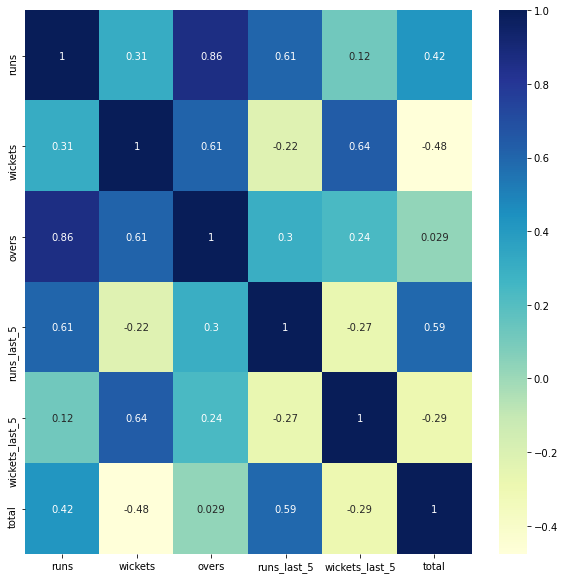

In [16]:
# HeatMap shows the correlation between the features

import matplotlib.pyplot as plt
import seaborn as sns 

figure = plt.figure(figsize=(10,10))
sns.heatmap(IPLdata.corr(), annot=True, cmap="YlGnBu")

# Data Preprocessing

In [17]:
# Here for features - 'batting_team' and 'bowling_team', the names of the teams are changed into numbers using encoder

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder = LabelEncoder()
for column in ['batting_team', 'bowling_team']: 
    IPLdata[column] = LabelEncoder.fit_transform(IPLdata[column])
IPLdata.sample(5)

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
46110,0,5,39,0,6.3,34,0,141
44062,0,2,125,3,15.4,45,2,186
29358,6,4,87,0,7.4,43,0,185
50261,5,3,100,2,14.2,38,0,152
5935,5,0,100,0,9.4,48,0,211


In [18]:
# transformation of the column

from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0, 1])], remainder='passthrough')

In [19]:
IPLdata = np.array(columnTransformer.fit_transform(IPLdata))

In [20]:
column = ['batting_team_Chennai Super Kings', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
          'batting_team_Kolkata Knight Riders', 'batting_team_Kings XI Punjab', 'batting_team_Sunrisers Hyderabad',
          'batting_team_Delhi Daredevils','batting_team_Royal Challengers Bangalore',
          
          'bowling_team_Chennai Super Kings', 'bowling_team_Mumbai Indians','bowling_team_Rajasthan Royals',
          'bowling_team_Kolkata Knight Riders', 'bowling_team_Kings XI Punjab','bowling_team_Sunrisers Hyderabad',
          'bowling_team_Delhi Daredevils','bowling_team_Royal Challengers Bangalore', 
          
          'runs', 'wickets', 'overs','runs_last_5', 'wickets_last_5', 'total']

FinalIPLdata = pd.DataFrame(IPLdata, columns=column)

In [21]:
# Visualize Encoded and final cleaned IPLdata
FinalIPLdata.sample(5)

,batting_team_Chennai Super Kings,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Kolkata Knight Riders,batting_team_Kings XI Punjab,batting_team_Sunrisers Hyderabad,batting_team_Delhi Daredevils,batting_team_Royal Challengers Bangalore,bowling_team_Chennai Super Kings,bowling_team_Mumbai Indians,...,bowling_team_Kings XI Punjab,bowling_team_Sunrisers Hyderabad,bowling_team_Delhi Daredevils,bowling_team_Royal Challengers Bangalore,runs,wickets,overs,runs_last_5,wickets_last_5,total
36553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,92.0,3.0,11.4,26.0,2.0,185.0
20951,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,202.0,3.0,18.5,73.0,2.0,223.0
5925,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,101.0,3.0,12.6,42.0,1.0,129.0
28533,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,52.0,3.0,8.4,39.0,0.0,183.0
12292,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,77.0,2.0,10.1,27.0,2.0,178.0


In [22]:
print("Shape of the FinalIPLdata:", FinalIPLdata.shape)

Shape of the FinalIPLdata: (37389, 22)


In [23]:
#Numerical Values of the FinalIPLdata

FinalIPLdata.describe()

,batting_team_Chennai Super Kings,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Kolkata Knight Riders,batting_team_Kings XI Punjab,batting_team_Sunrisers Hyderabad,batting_team_Delhi Daredevils,batting_team_Royal Challengers Bangalore,bowling_team_Chennai Super Kings,bowling_team_Mumbai Indians,...,bowling_team_Kings XI Punjab,bowling_team_Sunrisers Hyderabad,bowling_team_Delhi Daredevils,bowling_team_Royal Challengers Bangalore,runs,wickets,overs,runs_last_5,wickets_last_5,total
count,37389.000000,37389.000000,37389.000000,37389.000000,37389.000000,37389.000000,37389.000000,37389.000000,37389.000000,37389.000000,...,37389.000000,37389.000000,37389.000000,37389.000000,37389.000000,37389.000000,37389.000000,37389.000000,37389.000000,37389.000000
mean,0.140656,0.111851,0.146621,0.115729,0.157292,0.112546,0.127123,0.088181,0.111637,0.153655,...,0.142930,0.119367,0.144000,0.053197,98.899382,3.168980,12.820193,39.066972,1.324694,162.006900
std,0.347671,0.315187,0.353732,0.319904,0.364081,0.316042,0.333115,0.283562,0.314924,0.360622,...,0.350006,0.324224,0.351094,0.224430,39.546976,1.893907,4.032047,11.583513,1.068983,29.772833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,6.000000,10.000000,0.000000,67.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,67.000000,2.000000,9.300000,31.000000,1.000000,142.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,94.000000,3.000000,12.600000,38.000000,1.000000,163.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,126.000000,4.000000,16.300000,46.000000,2.000000,183.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,246.000000,10.000000,19.600000,94.000000,7.000000,246.000000


In [24]:
#Data types and not null counts of the features are displayed

FinalIPLdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37389 entries, 0 to 37388
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   batting_team_Chennai Super Kings          37389 non-null  float64
 1   batting_team_Mumbai Indians               37389 non-null  float64
 2   batting_team_Rajasthan Royals             37389 non-null  float64
 3   batting_team_Kolkata Knight Riders        37389 non-null  float64
 4   batting_team_Kings XI Punjab              37389 non-null  float64
 5   batting_team_Sunrisers Hyderabad          37389 non-null  float64
 6   batting_team_Delhi Daredevils             37389 non-null  float64
 7   batting_team_Royal Challengers Bangalore  37389 non-null  float64
 8   bowling_team_Chennai Super Kings          37389 non-null  float64
 9   bowling_team_Mumbai Indians               37389 non-null  float64
 10  bowling_team_Rajasthan Royals     

In [25]:
# count of Unique Values in each feature

FinalIPLdata.nunique()

batting_team_Chennai Super Kings              2
batting_team_Mumbai Indians                   2
batting_team_Rajasthan Royals                 2
batting_team_Kolkata Knight Riders            2
batting_team_Kings XI Punjab                  2
batting_team_Sunrisers Hyderabad              2
batting_team_Delhi Daredevils                 2
batting_team_Royal Challengers Bangalore      2
bowling_team_Chennai Super Kings              2
bowling_team_Mumbai Indians                   2
bowling_team_Rajasthan Royals                 2
bowling_team_Kolkata Knight Riders            2
bowling_team_Kings XI Punjab                  2
bowling_team_Sunrisers Hyderabad              2
bowling_team_Delhi Daredevils                 2
bowling_team_Royal Challengers Bangalore      2
runs                                        221
wickets                                      11
overs                                        98
runs_last_5                                  84
wickets_last_5                          

In [26]:
# Data-types of all features

FinalIPLdata.dtypes

batting_team_Chennai Super Kings            float64
batting_team_Mumbai Indians                 float64
batting_team_Rajasthan Royals               float64
batting_team_Kolkata Knight Riders          float64
batting_team_Kings XI Punjab                float64
batting_team_Sunrisers Hyderabad            float64
batting_team_Delhi Daredevils               float64
batting_team_Royal Challengers Bangalore    float64
bowling_team_Chennai Super Kings            float64
bowling_team_Mumbai Indians                 float64
bowling_team_Rajasthan Royals               float64
bowling_team_Kolkata Knight Riders          float64
bowling_team_Kings XI Punjab                float64
bowling_team_Sunrisers Hyderabad            float64
bowling_team_Delhi Daredevils               float64
bowling_team_Royal Challengers Bangalore    float64
runs                                        float64
wickets                                     float64
overs                                       float64
runs_last_5 

In [27]:
# the pre-processed is exported 

FinalIPLdata.to_csv('IPLdata\FinalIPLdata.csv')

# Visualization of Cleaned Data

<AxesSubplot:>

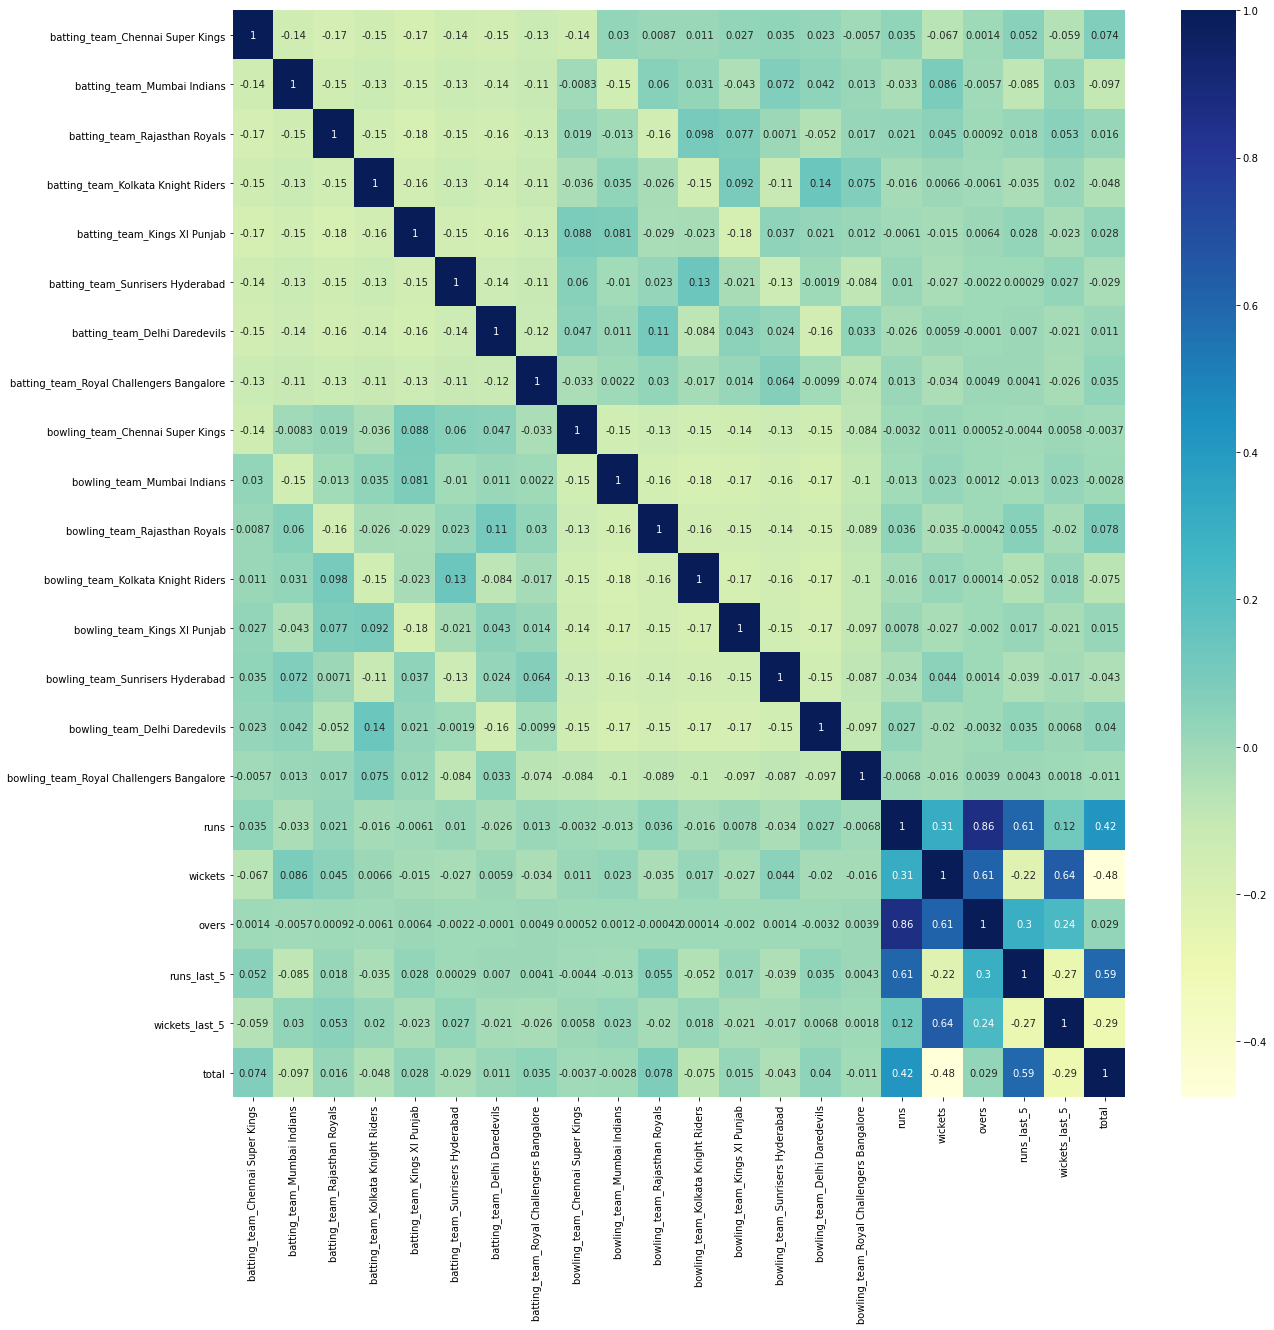

In [28]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(20,20))
sns.heatmap(FinalIPLdata.corr(), annot=True, cmap="YlGnBu",)


# Buinding Models

##  Target feature is selected and dataset is split into Training and Testing data

In [29]:
# the below snippet drops the target feature 

features = FinalIPLdata.drop(['total'], axis=1)

# the target feature is labeled as "target" 

target = FinalIPLdata['total']

In [30]:
# training and testing data is split into 75 : 25 

from sklearn.model_selection import train_test_split

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.25, shuffle=True)
print("Training Set :",train_features.shape,"\nTesting Set :", test_features.shape)

Training Set : (28041, 21) 
Testing Set : (9348, 21)


In [31]:
# Keeping track of model perfomances.The dict() function creates a dictionary.
models = dict()

### ElasticNet Regression

In [32]:
#code for ElasticNet Regression

from sklearn.linear_model import ElasticNet 
elastic_net = ElasticNet() 
elastic_net.fit(train_features, train_target)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
# Model Evaluation

train_score_elastic_net = str(elastic_net.score(train_features, train_target)*100)
test_score_elastic_net = str(elastic_net.score(test_features, test_target)*100)
print("Train Score : ",train_score_elastic_net[:5],"%\nTest Score : ",test_score_elastic_net[:5],"%")
models["elastic_net"] = test_score_elastic_net


Train Score :  66.81 %
Test Score :  67.42 %


In [36]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

print("****Model Evaluation - ElasticNet Regression **** \n")

print("Mean Absolute Error (MAE): {}".format(mae(test_target, elastic_net.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_target, elastic_net.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_target, elastic_net.predict(test_features)))))

****Model Evaluation - ElasticNet Regression **** 

Mean Absolute Error (MAE): 12.684703939252817
Mean Squared Error (MSE): 290.8615036659778
Root Mean Squared Error (RMSE): 17.05466222667508


### Ridge Regression

In [37]:
#Code for Ridge Regression

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_features, train_target) 


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
# Model Evaluation

train_score_ridge = str(ridge.score(train_features, train_target)*100)
test_score_ridge = str(ridge.score(test_features, test_target)*100)
print("Train Score : ",train_score_ridge[:5],"%\nTest Score : ",test_score_ridge[:5],"%")
models["ridge"] = test_score_ridge


Train Score :  68.24 %
Test Score :  68.93 %


In [39]:
print("****Model Evaluation - Ridge Regression **** \n")

print("Mean Absolute Error (MAE): {}".format(mae(test_target, ridge.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_target, ridge.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_target, ridge.predict(test_features)))))

****Model Evaluation - Ridge Regression **** 

Mean Absolute Error (MAE): 12.533797089242212
Mean Squared Error (MSE): 277.36192463349187
Root Mean Squared Error (RMSE): 16.654186399626127


### KNeighborsRegressor

In [40]:
#Code for #Code for Random Forest Regression

from sklearn import neighbors

for K in range(1):
    K = K+1
    
KNN = neighbors.KNeighborsRegressor(n_neighbors = K)
KNN.fit(train_features, train_target) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [41]:
# Model Evaluation

train_score_KNN = str(KNN.score(train_features, train_target)*100)
test_score_KNN = str(KNN.score(test_features, test_target)*100)
print("Train Score : ",train_score_KNN[:5],"%\nTest Score : ",test_score_KNN[:5],"%")
models["KNN"] = test_score_KNN


Train Score :  99.98 %
Test Score :  85.69 %


In [42]:
print("****Model Evaluation - Random Forest **** \n")

print("Mean Absolute Error (MAE): {}".format(mae(test_target, KNN.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_target, KNN.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_target, KNN.predict(test_features)))))

****Model Evaluation - Random Forest **** 

Mean Absolute Error (MAE): 4.194266153187848
Mean Squared Error (MSE): 127.74154899443731
Root Mean Squared Error (RMSE): 11.302280698798686


### Random Forest Regression

In [43]:
#Code for Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=80)

# the below snippet trains the data
random_forest.fit(train_features, train_target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
# Model Evaluation

train_score_random_forest = str(random_forest.score(train_features, train_target)*100)
test_score_random_forest = str(random_forest.score(test_features, test_target)*100)
print("Train Score : ",train_score_random_forest[:5],"%\nTest Score : ",test_score_random_forest[:5],"%")
models["random_forest"] = test_score_random_forest

Train Score :  99.11 %
Test Score :  94.27 %


In [45]:
print("****Model Evaluation - Random Forest **** \n")

print("Mean Absolute Error (MAE): {}".format(mae(test_target, random_forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_target, random_forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_target, random_forest.predict(test_features)))))

****Model Evaluation - Random Forest **** 

Mean Absolute Error (MAE): 4.31356897706665
Mean Squared Error (MSE): 51.1075493600426
Root Mean Squared Error (RMSE): 7.148954424252724


### Decision Tree Regressor

In [46]:
#code for Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()

# the below snippet trains the data
decision_tree.fit(train_features, train_target)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [47]:
# Model Evaluation

train_score_decision_tree = str(decision_tree.score(train_features, train_target) * 100)
test_score_decision_tree = str(decision_tree.score(test_features, test_target) * 100)
print("Train Score : ",train_score_decision_tree[:5],"%\nTest Score : ",test_score_decision_tree[:5],"%")
models["decision_tree"] = test_score_decision_tree

Train Score :  99.99 %
Test Score :  88.52 %


In [48]:
print("****Model Evaluation - Decision Tree **** \n")

print("Mean Absolute Error (MAE): {}".format(mae(test_target, decision_tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_target, decision_tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_target, decision_tree.predict(test_features)))))

****Model Evaluation - Decision Tree **** 

Mean Absolute Error (MAE): 3.6452182284980745
Mean Squared Error (MSE): 102.47927364142062
Root Mean Squared Error (RMSE): 10.123204712017861


### Neural Networks

In [49]:
#code for Neural Networks

from sklearn.neural_network import MLPRegressor
neural_networks = MLPRegressor(activation='logistic',max_iter=3000)

# the below snippet trains the data
neural_networks.fit(train_features, train_target)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=3000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [50]:
# Model Evaluation

train_score_neural_networks = str(neural_networks.score(train_features, train_target)*100)
test_score_neural_networks = str(neural_networks.score(test_features, test_target)*100)
print("Train Score :",train_score_neural_networks[:5],"%\nTest Score : ",test_score_neural_networks[:5],"%")
models["neural_networks"] = test_score_neural_networks 

Train Score : 91.16 %
Test Score :  90.46 %


In [51]:
print("****Model Evaluation -  Neural Networks **** \n")

print("Mean Absolute Error (MAE): {}".format(mae(test_target, neural_networks.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_target, neural_networks.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_target, neural_networks.predict(test_features)))))

****Model Evaluation -  Neural Networks **** 

Mean Absolute Error (MAE): 6.656494968085385
Mean Squared Error (MSE): 85.09447770088393
Root Mean Squared Error (RMSE): 9.224666807038828


### Support Vector Machine

In [52]:
from sklearn.svm import SVR
support_vector_machine = SVR()
# the below snippet trains the data
support_vector_machine.fit(train_features, train_target)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [53]:
# Model Evaluation

train_score_support_vector_machine = str(support_vector_machine.score(train_features, train_target)*100)
test_score_support_vector_machine = str(support_vector_machine.score(test_features, test_target)*100)
print("Train Score : ",train_score_support_vector_machine[:5],"%\nTest Score : ",test_score_support_vector_machine[:5],"%")
models["svm"] = test_score_support_vector_machine 

Train Score :  58.57 %
Test Score :  58.79 %


In [54]:
print("****Model Evaluation -  Support Vector Machine **** \n")

print("Mean Absolute Error (MAE): {}".format(mae(test_target, support_vector_machine.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_target, support_vector_machine.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_target, support_vector_machine.predict(test_features)))))

****Model Evaluation -  Support Vector Machine **** 

Mean Absolute Error (MAE): 14.504930747647336
Mean Squared Error (MSE): 367.94353317457563
Root Mean Squared Error (RMSE): 19.181854268411477


### Lasso Regression

In [55]:
from sklearn.linear_model import LassoCV
lasso_regression = LassoCV()

# the below snippet trains the data
lasso_regression.fit(train_features, train_target)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [56]:
# Model Evaluation

train_score_lasso_regression = str(lasso_regression.score(train_features, train_target)*100)
test_score_lasso_regression = str(lasso_regression.score(test_features, test_target)*100)
print("Train Score : ",train_score_lasso_regression[:5],"%\nTest Score : ",test_score_lasso_regression[:5],"%")
models["lasso_regression"] = test_score_lasso_regression

Train Score :  67.30 %
Test Score :  67.93 %


In [57]:
print("****Model Evaluation -  Lasso Regression **** \n")

print("Mean Absolute Error (MAE): {}".format(mae(test_target, lasso_regression.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_target, lasso_regression.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_target, lasso_regression.predict(test_features)))))

****Model Evaluation -  Lasso Regression **** 

Mean Absolute Error (MAE): 12.62365079719774
Mean Squared Error (MSE): 286.3278743886484
Root Mean Squared Error (RMSE): 16.921225558116305


### Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

# the below snippet trains the data
linear_regression.fit(train_features, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# Model Evaluation

train_score_linear_regression = str(linear_regression.score(train_features, train_target) * 100)
test_score_linear_regression = str(linear_regression.score(test_features, test_target) * 100)
print("Train Score : ",train_score_linear_regression[:5],"%\nTest Score : ",test_score_linear_regression[:5],"%")
models["linear_regression"] = test_score_linear_regression

Train Score :  68.24 %
Test Score :  68.94 %


In [60]:
print("****Model Evaluation -  Lasso Regression **** \n")

print("Mean Absolute Error (MAE): {}".format(mae(test_target, linear_regression.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_target, linear_regression.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_target, linear_regression.predict(test_features)))))

****Model Evaluation -  Lasso Regression **** 

Mean Absolute Error (MAE): 12.531083844388506
Mean Squared Error (MSE): 277.31306030750784
Root Mean Squared Error (RMSE): 16.65271930669306


### AdaBoost Model using Linear Regression as the base learner


In [61]:
# AdaBoost Model using Linear Regression as the base learner

from sklearn.ensemble import AdaBoostRegressor
adb_boost_regressor = AdaBoostRegressor(base_estimator=linear_regression)
adb_boost_regressor.fit(train_features, train_target)

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  random_state=None)

In [62]:
# Model Evaluationn

train_score_adb_boost_regressor = str(adb_boost_regressor.score(train_features, train_target) * 100)
test_score_adb_boost_regressor = str(adb_boost_regressor.score(test_features, test_target) * 100)
print("Train Score : ",train_score_adb_boost_regressor[:5],"%\nTest Score : ",test_score_adb_boost_regressor[:5],"%")
models["adb"] = test_score_adb_boost_regressor


Train Score :  65.99 %
Test Score :  66.67 %


In [63]:
print("****Model Evaluation -  AdaBoost Model using Linear Regression as the base learner **** \n")

print("Mean Absolute Error (MAE): {}".format(mae(test_target, adb_boost_regressor.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_target, adb_boost_regressor.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_target, adb_boost_regressor.predict(test_features)))))

****Model Evaluation -  AdaBoost Model using Linear Regression as the base learner **** 

Mean Absolute Error (MAE): 13.378012040562236
Mean Squared Error (MSE): 297.52614427140895
Root Mean Squared Error (RMSE): 17.248946178575924


### Best Model 

C:\Users\vimal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

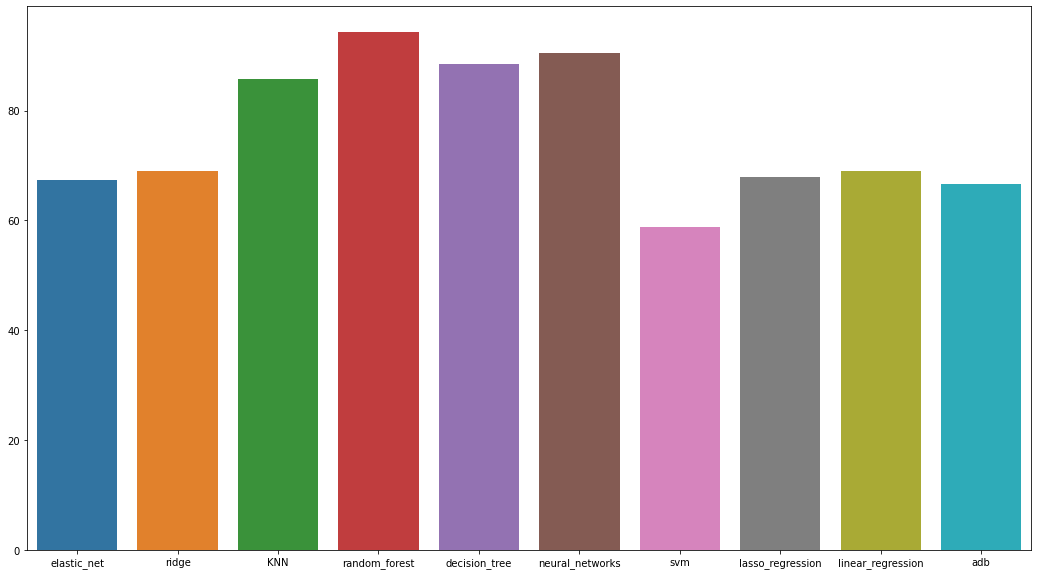

In [64]:
# Bar graph is ploted so cheeck which algorithm has performed better

import matplotlib.pyplot as plt
from seaborn import barplot

figure = plt.figure(figsize=(18,10))

model_names = list(models.keys())
accuracy = list(map(float, models.values()))
barplot(model_names, accuracy)

Random Forest Regressor has performed well when compared to other algorithms

# Predictions of Score using Random Forest

In [65]:
def prediction_of_score(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model = random_forest):
  array = []

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    array = array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    array = array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    array = array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    array = array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    array = array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Sunrisers Hyderabad':
    array = array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Delhi Daredevils':
    array = array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Royal Challengers Bangalore':
    array = array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    array = array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    array = array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    array = array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    array = array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    array = array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    array = array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Delhi Daredevils':
    array = array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    array = array + [0,0,0,0,0,0,0,1]

  array = array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  array = np.array([array])
  predictions = model.predict(array)
  return int(round(predictions[0]))


### Testing the model with sample data

- Batting Team : **Kolkata Knight Riders**
- Bowling Team : **Royal Challengers Bangalore**
- Final Score : **222/3**

In [66]:
batting_team='Kolkata Knight Riders'
bowling_team='Royal Challengers Bangalore'
score = prediction_of_score(batting_team, bowling_team, overs=8, runs=73, wickets=1, runs_last_5=47, wickets_last_5=1)
print("Predicted Score is",score, "\nReal Score is 222")

Predicted Score is 169 
Real Score is 222


From the above test the score may not match because it is an exceptional case that, In cricket some times more runs are scored in last 2 or 3 overs. Since this match was high scoring game the algorithm has predicted according to that situation.

### Testing the model with sample data

- Batting Team : **Rajasthan Royals**
- Bowling Team : **Delhi Daredevils**
- Final Score : **129/8**

In [67]:
batting_team='Rajasthan Royals'
bowling_team='Delhi Daredevils'
score = prediction_of_score(batting_team, bowling_team, overs=10, runs=57, wickets=4, runs_last_5=20, wickets_last_5=2)
print("Predicted Score is ",score, "\nReal Score is 129")

Predicted Score is  127 
Real Score is 129


### Testing the model with sample data

- Batting Team : **Royal Challengers Bangalore**
- Bowling Team : **Delhi Daredevils**
- Final Score : 161/6

In [68]:
batting_team='Royal Challengers Bangalore'
bowling_team='Delhi Daredevils'
score = prediction_of_score(batting_team, bowling_team, overs=13, runs=96, wickets=1, runs_last_5=48, wickets_last_5=0)
print("Predicted Score is ",score, "\nReal Score is 161")

Predicted Score is  195 
Real Score is 161


T20 Cricket is unpredictable, one over or one main wicket can change the whole game, even though it is tough to predict the socre machine learning have performed with good accuracy  

# Save the Models

In [69]:
from joblib import dump

dump(random_forest, "random_forest.pkl")
dump(neural_networks, "neural_networks.pkl")
dump(decision_tree, "decision_tree.pkl")
dump(KNN, "k_nearest_neighbors.pkl")


['k_nearest_neighbors.pkl']